In [1]:
import json
import pandas as pd
import numpy as np
import os
os.chdir('./yelp_dataset\yelp_dataset\yelp_dataset~')

In [2]:
with open('business.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line=f.readline()
    business = []
    for line in iter_f: 
        d = json.loads(line)
        if d['categories'] and 'Steakhouses' in d['categories']:
            business.append(list(d.values()))
f.close()

In [3]:
col_names = list(eval(line).keys())
business_df = pd.DataFrame(business, columns=col_names)
atttr=list(business_df['attributes'].values)
count={}
#remove none
attr=[i for i in atttr if i]

for i in range(31):
    count[i]=0
for i in range(len(attr)):
    count[len(attr[i])]+=1
count


{0: 0,
 1: 10,
 2: 10,
 3: 12,
 4: 12,
 5: 10,
 6: 10,
 7: 11,
 8: 15,
 9: 16,
 10: 23,
 11: 33,
 12: 22,
 13: 32,
 14: 50,
 15: 87,
 16: 134,
 17: 165,
 18: 285,
 19: 187,
 20: 142,
 21: 78,
 22: 63,
 23: 31,
 24: 43,
 25: 40,
 26: 24,
 27: 18,
 28: 17,
 29: 4,
 30: 1}

In [4]:
business_id=business_df[business_df['attributes']!=None]['business_id']
business_id

0       BvYU3jvGd0TJ7IyZdfiN2Q
1       jtlAfuINMCYVFpjwMgy2jw
2       wdsGP5rJinx0J5GcGzPQUw
3       SZ5KO1KNiwtrktKo5mpuLA
4       dGnjfY3KyeLg-nBQaT3Xqw
5       QSGerT1enEKlvJnYkwthHQ
6       YEsFk6UHqD66O2m5jmXSYg
7       pKQxecEqvmNWly-9aNSHOA
8       U8ubLSxnCKRAJRmN1XWZaA
9       QMnhYB50KWsUGQynqdUquw
10      NpFtNc51LaZr8Y5_o2wRaw
11      Bs_AR85Lm4eiHXAfeaKnVA
12      hXY9Yq0nOLgHsWLbjam--A
13      RcsfZ7IrWSNvM1AYcLmWNw
14      0cDKiKwsE6NAlfhx-cAWkA
15      VDn6tM_Q_08CVuNHSUH4Lw
16      -U0liwRSHGYBEMYVj8kFmQ
17      C3uxeV8VSiMGcdFGmos0QQ
18      2lcK3d4K7FU6O8wXdWzOmA
19      qJc12bxr4p-7ICE_Vhb-vA
20      FhIeCF6QrsLaRvAeu0oEPQ
21      rN3XnPL0hqE-7qBUfAbCTg
22      q4CJFETFt409oC92EInYig
23      IyVdd_IqwUtzQDTxw2W9qw
24      wmId49_BwzfWd3ww6GDMeA
25      A40rICFGj7b7OU4beaUYjw
26      CgsUUVwL8EBqcHFxrtkFtA
27      wopyolJM2hOAt3dPRmahNA
28      EzNdXFIaUqU1SC75dJJKRw
29      1Df5WnLX3DqN6ymlhqznaQ
                 ...          
1573    7hsi2ob7wOORBj5Pa2199Q
1574    

In [5]:
for i in range(len(attr)):
    if len(attr[i])==30:
        print(i)
attr[1219].keys()
#for i in attr[1219].keys():
for i in range(len(attr)):
    for j in list(set(attr[1219].keys())-set(attr[i].keys())):
        attr[i][j]=float('nan')

1219


In [6]:
attributs=pd.DataFrame(attr)
attributs['business_id']=business_id



In [7]:
attributs['stars']=business_df[business_df['attributes']!=None]['stars']
len(attributs['GoodForKids'])

1585

<function matplotlib.pyplot.show(*args, **kw)>

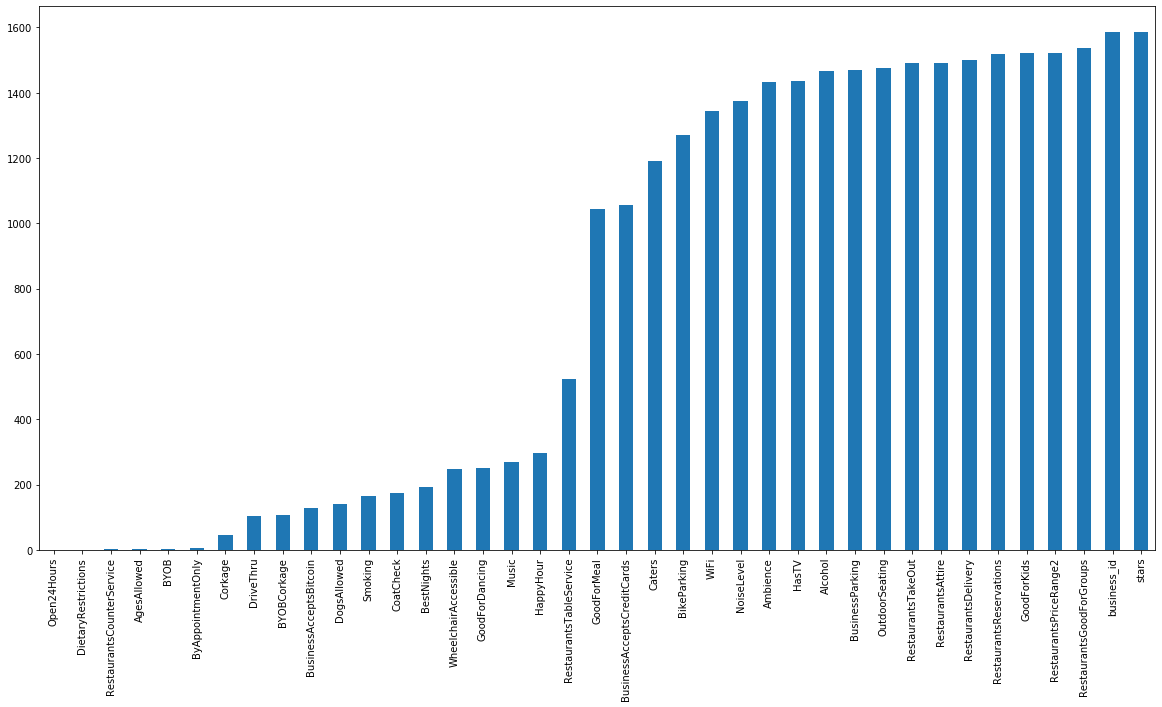

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
attributs.count().sort_values(ascending=True).plot.bar()
plt.show

In [34]:
attributs.count().sort_values(ascending=True).index

Index(['Open24Hours', 'DietaryRestrictions', 'RestaurantsCounterService',
       'AgesAllowed', 'BYOB', 'ByAppointmentOnly', 'Corkage', 'DriveThru',
       'BYOBCorkage', 'BusinessAcceptsBitcoin', 'DogsAllowed', 'Smoking',
       'CoatCheck', 'BestNights', 'WheelchairAccessible', 'GoodForDancing',
       'Music', 'HappyHour', 'RestaurantsTableService', 'GoodForMeal',
       'BusinessAcceptsCreditCards', 'Caters', 'BikeParking', 'WiFi',
       'NoiseLevel', 'Ambience', 'HasTV', 'Alcohol', 'BusinessParking',
       'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsAttire',
       'RestaurantsDelivery', 'RestaurantsReservations', 'GoodForKids',
       'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'business_id',
       'stars'],
      dtype='object')

In [9]:
#remove attrbutes with small amount
#18 attributes
att_new=attributs.count().sort_values(ascending=True)[19:]
df_new=attributs[list(att_new.index)]
df_new

,GoodForMeal,BusinessAcceptsCreditCards,Caters,BikeParking,WiFi,NoiseLevel,Ambience,HasTV,Alcohol,BusinessParking,OutdoorSeating,RestaurantsTakeOut,RestaurantsAttire,RestaurantsDelivery,RestaurantsReservations,GoodForKids,RestaurantsPriceRange2,RestaurantsGoodForGroups,business_id,stars
0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,u'full_bar',"{'garage': False, 'street': False, 'validated'...",False,True,u'casual',False,True,False,2,True,BvYU3jvGd0TJ7IyZdfiN2Q,3.5
1,NaN,NaN,NaN,False,NaN,u'quiet',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,True,u'casual',NaN,NaN,NaN,3,NaN,jtlAfuINMCYVFpjwMgy2jw,4.0
2,NaN,True,False,False,u'no',u'quiet',"{'romantic': False, 'intimate': False, 'touris...",False,'full_bar',"{'garage': True, 'street': False, 'validated':...",False,False,u'dressy',False,True,False,3,True,wdsGP5rJinx0J5GcGzPQUw,4.0
3,NaN,True,NaN,False,NaN,u'quiet',"{'romantic': False, 'intimate': False, 'touris...",False,u'full_bar',"{'garage': False, 'street': False, 'validated'...",True,True,u'dressy',False,True,True,3,True,SZ5KO1KNiwtrktKo5mpuLA,3.5
4,NaN,NaN,True,False,u'no',u'very_loud',"{'romantic': False, 'intimate': False, 'classy...",False,u'full_bar',"{'garage': False, 'street': True, 'validated':...",True,True,u'casual',False,True,True,3,True,dGnjfY3KyeLg-nBQaT3Xqw,4.5
5,"{'dessert': False, 'latenight': False, 'lunch'...",True,True,True,u'free','average',"{'romantic': False, 'intimate': False, 'touris...",True,'full_bar',"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,2,True,QSGerT1enEKlvJnYkwthHQ,2.5
6,NaN,True,NaN,NaN,NaN,NaN,NaN,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",NaN,NaN,u'dressy',False,True,NaN,3,True,YEsFk6UHqD66O2m5jmXSYg,2.5
7,NaN,NaN,NaN,NaN,'free',NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,True,NaN,NaN,True,True,2,True,pKQxecEqvmNWly-9aNSHOA,3.5
8,"{'dessert': True, 'latenight': False, 'lunch':...",True,False,True,u'free',u'quiet',"{'touristy': False, 'hipster': False, 'romanti...",True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",True,True,'dressy',False,True,False,3,True,U8ubLSxnCKRAJRmN1XWZaA,4.0
9,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,False,True,'casual',False,False,True,2,False,QMnhYB50KWsUGQynqdUquw,3.0


In [10]:
df_new['BusinessAcceptsCreditCards'].replace('None', np.nan, inplace=True)
df_new['BusinessAcceptsCreditCards'].value_counts()

C:\Users\mao\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True     1050
False       4
Name: BusinessAcceptsCreditCards, dtype: int64

In [11]:
df_new['BusinessAcceptsCreditCards'].fillna('True', inplace=True)
#df_new['Ambience'][1]
df_new['BusinessAcceptsCreditCards'].value_counts()

C:\Users\mao\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True     1581
False       4
Name: BusinessAcceptsCreditCards, dtype: int64

In [12]:
df_new.replace('None', np.nan, inplace=True)
df_new['Caters'].value_counts()

C:\Users\mao\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


False    739
True     449
Name: Caters, dtype: int64

In [13]:
#for i in df_new['NoiseLevel']:
df_new['NoiseLevel'].replace('u\'quiet\'','quite',inplace=True)
df_new['NoiseLevel'].replace('u\'very_loud\'','very_loud',inplace=True)
df_new['NoiseLevel'].replace('u\'average\'','average',inplace=True)
df_new['NoiseLevel'].replace('u\'loud\'','loud',inplace=True)
df_new['NoiseLevel'].replace('\'quiet\'','quite',inplace=True)
df_new['NoiseLevel'].replace('\'very_loud\'','very_loud',inplace=True)
df_new['NoiseLevel'].replace('\'average\'','average',inplace=True)
df_new['NoiseLevel'].replace('\'loud\'','loud',inplace=True)
df_new['NoiseLevel'].value_counts()

average      1012
quite         214
loud          121
very_loud      26
Name: NoiseLevel, dtype: int64

In [14]:
#huigui
#df_new['Caters'][:15]
#df_new['BikeParking'].value_counts(),wifi,hasTV,outdorrr,
df_new['Alcohol'].replace('u\'full_bar\'','full_bar',inplace=True)
df_new['Alcohol'].replace('u\'beer_and_wine\'','beer_and_wine',inplace=True)
df_new['Alcohol'].replace('\'beer_and_wine\'','beer_and_wine',inplace=True)
df_new['Alcohol'].replace('\'full_bar\'','full_bar',inplace=True)
df_new['Alcohol'].replace('\'none\'', np.nan, inplace=True)
df_new['Alcohol'].replace('u\'none\'', np.nan, inplace=True)
df_new['Alcohol'].value_counts()

full_bar         1305
beer_and_wine      64
Name: Alcohol, dtype: int64

In [15]:
#RestaurantsAttire
df_new['RestaurantsAttire'].replace('u\'casual\'','\'casual\'',inplace=True)
df_new['RestaurantsAttire'].replace('u\'dressy\'','\'dressy\'',inplace=True)
df_new['RestaurantsAttire'].replace('\'formal\'','\'dressy\'',inplace=True)
df_new['RestaurantsAttire'].value_counts()

'casual'    1197
'dressy'     295
Name: RestaurantsAttire, dtype: int64

In [16]:
df_new['WiFi'].replace('u\'free\'','\'free\'',inplace=True)
df_new['WiFi'].replace('u\'paid\'','\'paid\'',inplace=True)
df_new['WiFi'].replace('u\'no\'','\'no\'',inplace=True)
df_new['WiFi'].value_counts()

'free'    768
'no'      560
'paid'     14
Name: WiFi, dtype: int64

In [17]:
df_new['RestaurantsPriceRange2'].value_counts()

2    873
3    464
4    107
1     79
Name: RestaurantsPriceRange2, dtype: int64

In [18]:
df_new['RestaurantsGoodForGroups'].value_counts()

True     1492
False      44
Name: RestaurantsGoodForGroups, dtype: int64

In [19]:
#train data
df_all=df_new.dropna()
df_all

,GoodForMeal,BusinessAcceptsCreditCards,Caters,BikeParking,WiFi,NoiseLevel,Ambience,HasTV,Alcohol,BusinessParking,OutdoorSeating,RestaurantsTakeOut,RestaurantsAttire,RestaurantsDelivery,RestaurantsReservations,GoodForKids,RestaurantsPriceRange2,RestaurantsGoodForGroups,business_id,stars
5,"{'dessert': False, 'latenight': False, 'lunch'...",True,True,True,'free',average,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,2,True,QSGerT1enEKlvJnYkwthHQ,2.5
8,"{'dessert': True, 'latenight': False, 'lunch':...",True,False,True,'free',quite,"{'touristy': False, 'hipster': False, 'romanti...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'dressy',False,True,False,3,True,U8ubLSxnCKRAJRmN1XWZaA,4.0
10,"{'dessert': False, 'latenight': False, 'lunch'...",True,True,True,'free',loud,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'casual',False,False,True,2,True,NpFtNc51LaZr8Y5_o2wRaw,3.5
11,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,False,'casual',False,True,True,3,True,Bs_AR85Lm4eiHXAfeaKnVA,2.5
16,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,False,'no',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'casual',False,True,False,3,True,-U0liwRSHGYBEMYVj8kFmQ,3.0
18,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'no',loud,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'dressy',False,True,False,3,True,2lcK3d4K7FU6O8wXdWzOmA,4.0
19,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,False,'no',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': True, 'validated':...",False,True,'casual',False,False,True,2,True,qJc12bxr4p-7ICE_Vhb-vA,3.5
20,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'no',average,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,3,True,FhIeCF6QrsLaRvAeu0oEPQ,3.5
21,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,False,'casual',False,True,False,3,True,rN3XnPL0hqE-7qBUfAbCTg,4.0
23,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'casual',False,True,True,2,True,IyVdd_IqwUtzQDTxw2W9qw,2.5


In [20]:
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers

In [21]:
def weighted_hamming(data):
    """ Compute weighted hamming distance on categorical variables. For one variable, it is equal to 1 if
        the values between point A and point B are different, else it is equal the relative frequency of the
        distribution of the value across the variable. For multiple variables, the harmonic mean is computed
        up to a constant factor.
        @params:
            - data = a pandas data frame of categorical variables
        @returns:
            - distance_matrix = a distance matrix with pairwise distance for all attributes
    """
    categories_dist = []
    
    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    """ Compute the pairwise distance attribute by attribute in order to account for different variables type:
        - Continuous
        - Categorical
        For ordinal values, provide a numerical representation taking the order into account.
        Categorical variables are transformed into a set of binary ones.
        If both continuous and categorical distance are provided, a Gower-like distance is computed and the numeric
        variables are all normalized in the process.
        If there are missing values, the mean is computed for numerical attributes and the mode for categorical ones.
        
        Note: If weighted-hamming distance is chosen, the computation time increases a lot since it is not coded in C 
        like other distance metrics provided by scipy.
        @params:
            - data                  = pandas dataframe to compute distances on.
            - numeric_distances     = the metric to apply to continuous attributes.
                                      "euclidean" and "cityblock" available.
                                      Default = "euclidean"
            - categorical_distances = the metric to apply to binary attributes.
                                      "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                      available. Default = "jaccard"
        @returns:
            - the distance matrix
    """
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    # Get the type of each attribute (Numeric or categorical)
    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    # Check the content of the distances parameter
    if numeric_distance not in possible_continuous_distances:
        print("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print ("The binary distance " + categorical_distance + " is not supported.")
        return None

    # Separate the data frame into categorical and numeric attributes and normalize numeric data
    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    # Replace missing values with column mean for numeric values and mode for categorical ones. With the mode, it
    # triggers a warning: "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
    # but the value are properly replaced
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    # "Dummifies" categorical variables in place
    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    # Fill the diagonal with NaN values
    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)


def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    """ Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.
        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5
        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None
    """

    # Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    # Check for possible errors
    if number_observations < 3:
        print ("Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print ("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print ("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print ("The only method allowed for categorical target variable is the mode.")
        return None

    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [22]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [23]:
df_1=DataFrameImputer().fit_transform(df_new)
df_1

,GoodForMeal,BusinessAcceptsCreditCards,Caters,BikeParking,WiFi,NoiseLevel,Ambience,HasTV,Alcohol,BusinessParking,OutdoorSeating,RestaurantsTakeOut,RestaurantsAttire,RestaurantsDelivery,RestaurantsReservations,GoodForKids,RestaurantsPriceRange2,RestaurantsGoodForGroups,business_id,stars
0,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,False,2,True,BvYU3jvGd0TJ7IyZdfiN2Q,3.5
1,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,False,'free',quite,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,3,True,jtlAfuINMCYVFpjwMgy2jw,4.0
2,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,False,'no',quite,"{'romantic': False, 'intimate': False, 'touris...",False,full_bar,"{'garage': True, 'street': False, 'validated':...",False,False,'dressy',False,True,False,3,True,wdsGP5rJinx0J5GcGzPQUw,4.0
3,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,False,'free',quite,"{'romantic': False, 'intimate': False, 'touris...",False,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'dressy',False,True,True,3,True,SZ5KO1KNiwtrktKo5mpuLA,3.5
4,"{'dessert': False, 'latenight': False, 'lunch'...",True,True,False,'no',very_loud,"{'romantic': False, 'intimate': False, 'classy...",False,full_bar,"{'garage': False, 'street': True, 'validated':...",True,True,'casual',False,True,True,3,True,dGnjfY3KyeLg-nBQaT3Xqw,4.5
5,"{'dessert': False, 'latenight': False, 'lunch'...",True,True,True,'free',average,"{'romantic': False, 'intimate': False, 'touris...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,2,True,QSGerT1enEKlvJnYkwthHQ,2.5
6,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'dressy',False,True,True,3,True,YEsFk6UHqD66O2m5jmXSYg,2.5
7,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'touristy': False, 'hipster': False, 'romanti...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,True,True,2,True,pKQxecEqvmNWly-9aNSHOA,3.5
8,"{'dessert': True, 'latenight': False, 'lunch':...",True,False,True,'free',quite,"{'touristy': False, 'hipster': False, 'romanti...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",True,True,'dressy',False,True,False,3,True,U8ubLSxnCKRAJRmN1XWZaA,4.0
9,"{'dessert': False, 'latenight': False, 'lunch'...",True,False,True,'free',average,"{'romantic': False, 'intimate': False, 'classy...",True,full_bar,"{'garage': False, 'street': False, 'validated'...",False,True,'casual',False,False,True,2,False,QMnhYB50KWsUGQynqdUquw,3.0


In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image  
from sklearn.tree import export_graphviz
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 20 columns):
GoodForMeal                   1585 non-null object
BusinessAcceptsCreditCards    1585 non-null object
Caters                        1585 non-null object
BikeParking                   1585 non-null object
WiFi                          1585 non-null object
NoiseLevel                    1585 non-null object
Ambience                      1585 non-null object
HasTV                         1585 non-null object
Alcohol                       1585 non-null object
BusinessParking               1585 non-null object
OutdoorSeating                1585 non-null object
RestaurantsTakeOut            1585 non-null object
RestaurantsAttire             1585 non-null object
RestaurantsDelivery           1585 non-null object
RestaurantsReservations       1585 non-null object
GoodForKids                   1585 non-null object
RestaurantsPriceRange2        1585 non-null object
RestaurantsGoodForGroups  

In [25]:
X = df_1.iloc[:,0:18] # Features
y = df_1['stars'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=15)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: could not convert string to float: "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}"

In [ ]:
X = df_1.iloc[:,0:18]
df_1

In [ ]:
df_new.to_csv(r'C:\Users\mao\Documents\wisconsin\628\df_orig.csv',index=False)

In [ ]:
def trans(whichmeal):
    meal_Dessert=[]
    for i in df_new['GoodForMeal']:
        if type(i)==float:
            meal_Dessert.append(i)
        else:
            meal_Dessert.append(eval(i)[whichmeal])
    return meal_Dessert
df_new['meal_dessert']=trans('dessert')
df_new['meal_latenight']=trans('latenight')
df_new['meal_lunch']=trans('lunch')
df_new['meal_dinner']=trans('dinner')
df_new['meal_brunch']=trans('brunch')
df_new['meal_breakfast']=trans('breakfast')


In [ ]:
trend=0
for i in df_new['Ambience']:
    if type(eval(i)['trendy'])==
        trend+=1
    elif eval(i)['trendy']==True
        continue

In [ ]:
df_new['Ambience']

In [ ]:
business_df